In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

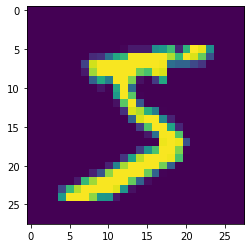

In [4]:
plt.imshow(X_train[0])

In [5]:
y_train[0]

5

## Building a simple NN

In [6]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint, Callback
from tensorflow.keras.activations import relu, softmax

In [7]:
X_train= X_train/255
X_test = X_test/255

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
input_layer = Input(shape=[28,28], name='raw_input')
flatten = Flatten()(input_layer)
hidden1 = Dense(200, activation=relu)(flatten)
hidden2 = Dense(100, activation=relu)(hidden1)
hidden3 = Dense(50, activation=relu)(hidden2)
output = Dense(units=10, activation=softmax)(hidden3)

In [10]:
model1 = Model(inputs=input_layer, outputs=output)

In [11]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 raw_input (InputLayer)      [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 182,660
Trainable params: 182,660
Non-trainable

In [12]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Convert y_train & y_test to categorical

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [15]:
y_train.shape

(60000, 10)

### Declaring callbacks

In [16]:
import os

In [17]:
## For saving models
# os.mkdir('./saved_models')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: './saved_models'

In [ ]:
## For saving logs
# os.mkdir('./logs')

In [18]:
earlyStop = EarlyStopping(monitor='val_loss', patience=3)
modelCP = ModelCheckpoint(filepath='./saved_models/mnist.h5', save_best_only=True)
board = TensorBoard(log_dir='./logs')

## Custom Callback

In [19]:
class ValTrainLossRatio(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))
        return super().on_epoch_end(epoch, logs=logs)

In [20]:
custom_callback_instance = ValTrainLossRatio()

In [21]:
model1.fit(x=(X_train), y=(y_train), batch_size=32, epochs=50, callbacks=[earlyStop, modelCP, custom_callback_instance, board], validation_data=(X_test, y_test))

Epoch 1/50
1861/1875 [============================>.] - ETA: 0s - loss: 0.2272 - accuracy: 0.9325
val/train: 0.58
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2264 - accuracy: 0.9327 - val_loss: 0.1309 - val_accuracy: 0.9619
Epoch 2/50
1858/1875 [============================>.] - ETA: 0s - loss: 0.0964 - accuracy: 0.9706
val/train: 0.96
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0963 - accuracy: 0.9707 - val_loss: 0.0926 - val_accuracy: 0.9698
Epoch 3/50
1861/1875 [============================>.] - ETA: 0s - loss: 0.0652 - accuracy: 0.9794
val/train: 1.12
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0654 - accuracy: 0.9792 - val_loss: 0.0734 - val_accuracy: 0.9773
Epoch 4/50
1856/1875 [============================>.] - ETA: 0s - loss: 0.0526 - accuracy: 0.9831
val/train: 1.38
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0525 - accuracy: 0.9832 - val_loss: 0.0723 - val_accuracy: 0.9761
Epoch 5/50
1

### Looking at the summary of the trained layers

In [30]:
[(var.name, var.trainable) for var in model1.layers[4].variables]

[('dense_2/kernel:0', True), ('dense_2/bias:0', True)]